In [1]:
import pandas as pd
import numpy as np
import pickle

In [5]:
with open('adj_mx_Seoul_all.pkl', 'rb') as f:
    data = pickle.load(f)
    
adj = data[2]
adj_col = data[0]

adj_df = pd.DataFrame(adj, columns=adj_col, index = adj_col)
adj_df

,1210007700,1210008500,1210009500,1210010300,1210011300,1210013700,1220011900,1220016300,1220021100,1220025100,...,1210013800,1210013000,1210012200,1210012300,1210013100,1210013900,1210014900,1210015900,1210017100,1210018300
1210007700,1.000000,0.403277,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1210008500,0.403277,1.000000,0.911334,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1210009500,0.000000,0.911334,1.000000,0.374877,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1210010300,0.000000,0.000000,0.374877,1.000000,0.798147,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1210011300,0.000000,0.000000,0.000000,0.798147,1.000000,0.688206,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1210013900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.150989,0.999506,0.475062,0.0,0.475062,1.000000,0.150989,0.000000,0.000000,0.0
1210014900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.999506,0.150989,0.000000,0.0,0.000000,0.150989,1.000000,0.138531,0.000000,0.0
1210015900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.138531,0.000000,0.000000,0.0,0.000000,0.000000,0.138531,1.000000,0.384952,0.0
1210017100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.384952,1.000000,0.0


In [9]:
df0 = pd.read_csv('speed_gangnam_0.csv').drop(columns=['Unnamed: 0'])
df5 = pd.read_csv('speed_gangnam_5.csv').drop(columns=['Unnamed: 0'])

In [19]:
result = []
mx, my = np.shape(df0.values)
fx, fy = np.shape(adj)

In [21]:
df0_val = df0.values

In [23]:
for i in range(mx-fx+1):
    for j in range(my-fy+1):
        result.append((df0_val[i:i+fy,j:j+fy] * adj).sum())

In [24]:
result = np.array(result)
result.shape

(2375,)

In [29]:
np.convolve([1,2,3,4,5], [5,4,3,2,1])

array([ 5, 14, 26, 40, 55, 40, 26, 14,  5])

In [28]:
np.convolve([1,2,3,4,5], [5,4,3,2,1], 'same'), np.convolve([1,2,3,4,5], [5,4,3,2,1], 'valid')

(array([26, 40, 55, 40, 26]), array([55]))

In [70]:
x1 = df0_val[0]
x2 = df0_val[1]
x1.shape, x2.shape

((506,), (506,))

In [71]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [72]:
scaler.fit(df0_val)

StandardScaler()

In [73]:
x1 = scaler.transform(x1.reshape(1, -1)).reshape(-1,)
x2 = scaler.transform(x2.reshape(1, -1)).reshape(-1,)

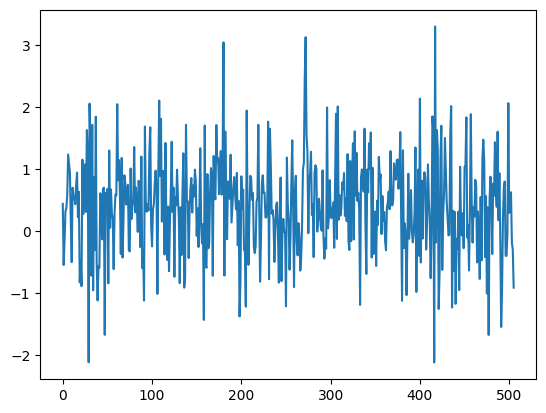

In [74]:
import matplotlib.pyplot as plt

plt.plot(x1)

In [80]:
np.convolve(x1, x2).shape

(1011,)

In [84]:
t = scaler.transform(np.convolve(x1, x2, 'same').reshape(1, -1)).reshape(-1,)

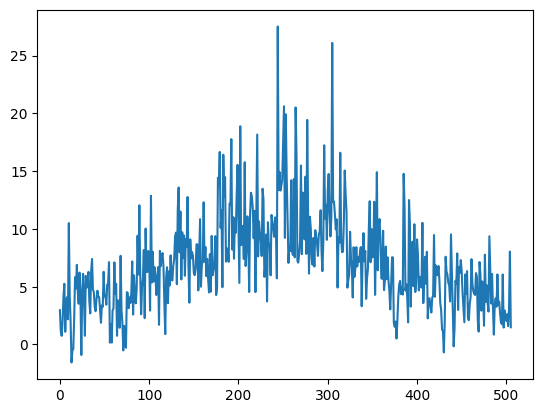

In [86]:
plt.plot(t)